In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ModelLib
from scipy.optimize import root

In [2]:
model = ModelLib.SIRModels()


/Users/simonblaue/Desktop/Epidemics_SRI_model/ModelLib.py:18: RuntimeWarning: overflow encountered in exp
  self.P = lambda H: self.p_base+(1-self.p_base)/self.p_cap*self.epsilon*np.log(1+np.exp(1/self.epsilon*(self.p_cap-H)))


In [51]:
Ts=np.arange(1,40,0.1)
p_bases = np.arange(0.01,0.25,0.001)
Stable = []
T_stable = []
for p_base in p_bases:
    T_stables = []
    for T in Ts:
        model.T = T
        model.p_base = p_base
        solver = root(model.MemoryIncrement, [1.,1.,1.,1.,1.]) #solve for fixpoints
        fixpoints = solver.x
        Jacobi = model.JacobiMemory(fixpoints)
        w = np.linalg.eigvals(Jacobi)
        w_real=np.real(w)
        max_v = np.amax(w_real)
        Stable.append(max_v<0)
        if max_v<0:
            T_stables.append(T)
        
    if len(T_stables)<0:
        T_stable.append(np.amax(T_stables))
    else:
        T_stable.append(None)


Stable = np.array(Stable).reshape(len(p_bases), len(Ts))



/Users/simonblaue/Desktop/Epidemics_SRI_model/ModelLib.py:18: RuntimeWarning: overflow encountered in exp
  self.P = lambda H: self.p_base+(1-self.p_base)/self.p_cap*self.epsilon*np.log(1+np.exp(1/self.epsilon*(self.p_cap-H)))


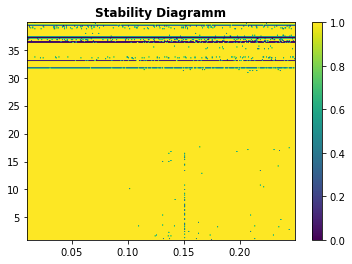

In [52]:
im = plt.imshow(Stable,vmin=0,vmax=1,extent=[p_bases.min(),p_bases.max(),Ts.min(),Ts.max()],aspect='auto')
plt.colorbar(im)
plt.title('Stability Diagramm', fontweight ="bold")
plt.show()

In [49]:
len(T_stable)

240

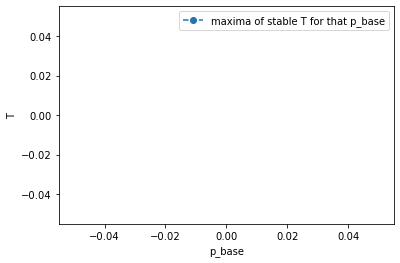

In [50]:
fig, ax = plt.subplots(1, 1)

ax.plot(p_bases,T_stable, label='maxima of stable T for that p_base', marker='o', linestyle='--')

plt.xlabel('p_base')
plt.ylabel('T')
plt.legend()
plt.show()